In [86]:
import pandas as pd
import os

def get_absolute_path(relative_path):
    # Convert relative path to absolute path
    absolute_path = os.path.abspath(relative_path)
    return absolute_path

In [87]:
# Load the dataset
stations_final = pd.read_csv('../data/processed/groupby/stations_final.csv')

In [90]:
# Add post_code column to the dataset based on station_id
stations_final['post_code'] = stations_final['post_code'].astype('category')

# Detect laboral and no laboral days using the 2023 month day hour
date = '2023-' + stations_final['month'].astype(str) + '-' + stations_final['day'].astype(str)

stations_final['laboral_day'] = pd.to_datetime(date, format='%Y-%m-%d').dt.dayofweek < 5

Number of laboral days: 153002
Number of no laboral days: 52550


/var/folders/b_/j13k5nq9673_y1f35zsdbfk80000gn/T/ipykernel_9959/1327854523.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stations_final_grouped = stations_final.groupby('post_code').mean().reset_index()


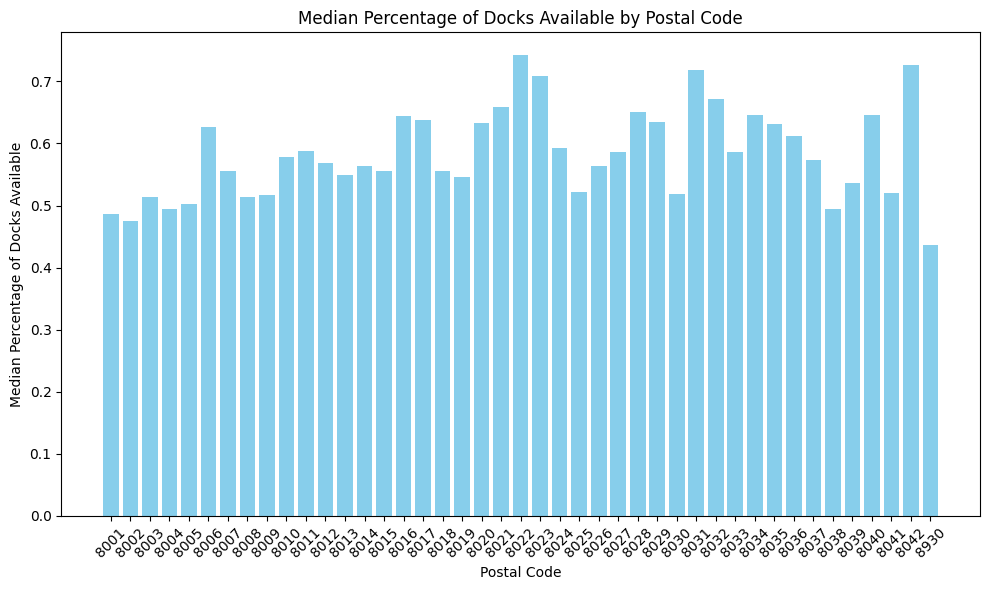

,index,station_id,month,day,hour,ctx_4,ctx_3,ctx_2,ctx_1,percentage_docks_available,post_code,altitude,capacity,is_charging_station
0,0,1,1,1,0,0.148148,0.148148,0.148148,0.148148,0.148148,8013,16.0,45,True
1,1,1,1,1,5,0.161111,0.138889,0.146296,0.129630,0.153704,8013,16.0,45,True
2,2,1,1,1,10,0.146296,0.190741,0.222222,0.209259,0.200000,8013,16.0,45,True
3,3,1,1,1,15,0.198148,0.200000,0.300000,0.307407,0.342593,8013,16.0,45,True
4,4,1,1,1,20,0.364815,0.394444,0.283333,0.224074,0.294444,8013,16.0,45,True


In [72]:
import pandas as pd
import matplotlib.pyplot as plt

stations_final_grouped = stations_final.groupby('post_code').mean().reset_index()
stations_final_grouped['post_code'] = stations_final_grouped['post_code'].astype('category')

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the size to fit your specific needs
# Create a numeric range for the x-axis positions
x_pos = range(len(stations_final_grouped['post_code']))

# Plot using numeric x positions
plt.bar(x_pos, stations_final_grouped['percentage_docks_available'], color='skyblue')
plt.xlabel('Postal Code')  # Label for the x-axis
plt.ylabel('Median Percentage of Docks Available')  # Label for the y-axis
plt.title('Median Percentage of Docks Available by Postal Code')  # Title of the plot

# Set x-ticks to be the postal codes from the DataFrame
plt.xticks(x_pos, stations_final_grouped['post_code'], rotation=45)  # Rotate the postal codes on x-axis to avoid clutter
plt.tight_layout()  # Adjusts plot parameters to give some padding
plt.show()

The figure shows the mean percentage of available spots per station by postal code. There are significant differences in percentages (means) between different zones of Barcelona. The stations in some postal codes are on average emptier (have higher percentages of available spots) than others. This is especially for post codes in high altutide zones of Barcelona (such as 08021, 08022, 08023, 08031, 08032). This makese sense because most people take the bike to go downhill but few people do the reverse.



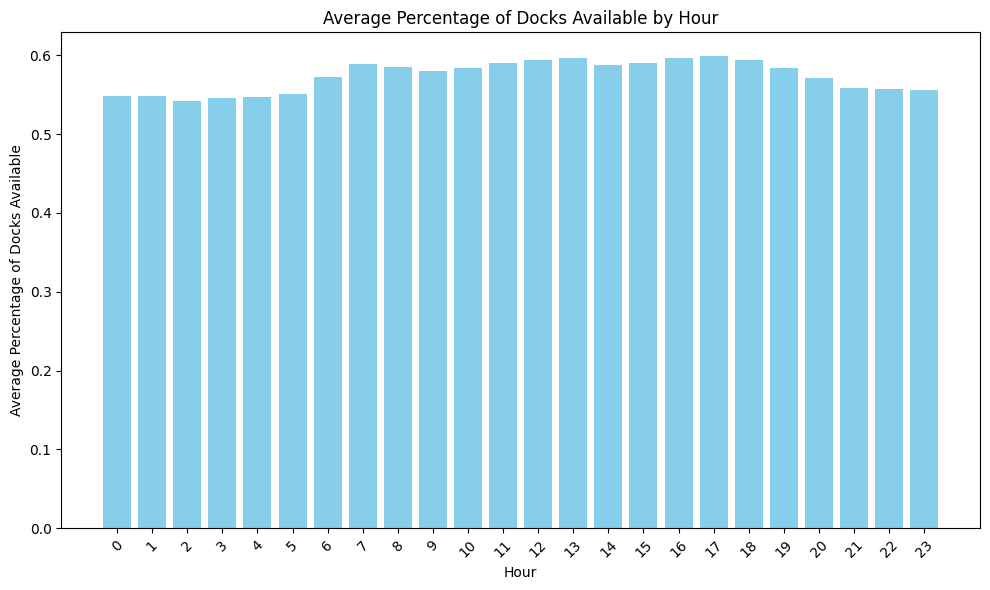

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'hour' and calculate the mean of 'percentage_docks_available' only
stations_final_grouped = stations_final.groupby('hour')['percentage_docks_available'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the size to fit your specific needs
# Create a numeric range for the x-axis positions
x_pos = range(len(stations_final_grouped['hour']))

# Plot using numeric x positions
plt.bar(x_pos, stations_final_grouped['percentage_docks_available'], color='skyblue')
plt.xlabel('Hour')  # Correct Label for the x-axis
plt.ylabel('Average Percentage of Docks Available')  # Correct Label for the y-axis
plt.title('Average Percentage of Docks Available by Hour')  # Correct Title of the plot

# Set x-ticks to be the hours from the DataFrame
plt.xticks(x_pos, stations_final_grouped['hour'], rotation=45)  # Adjust rotation if necessary
plt.tight_layout()  # Adjusts plot parameters to give some padding
plt.show()

The figure shows the mean percentage of available spots per station by hour. We had expected that, during the day, significantly more spots would be available than in the night because of many bikes circulating during the day. However, the absolute difference between day and night hours is small (2-3 percentage points), which suggests that the share of bikes circulating in any given moment is relatively small compared to the number of total bikes in the Bicing system. This can be seen in the last graph, which plots the average share of spots available for each station against the altitude of the station (slight upward trend).

/var/folders/b_/j13k5nq9673_y1f35zsdbfk80000gn/T/ipykernel_9959/3748776507.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stations_grouped = stations_final.groupby(['post_code', 'hour'])['percentage_docks_available'].mean().reset_index()


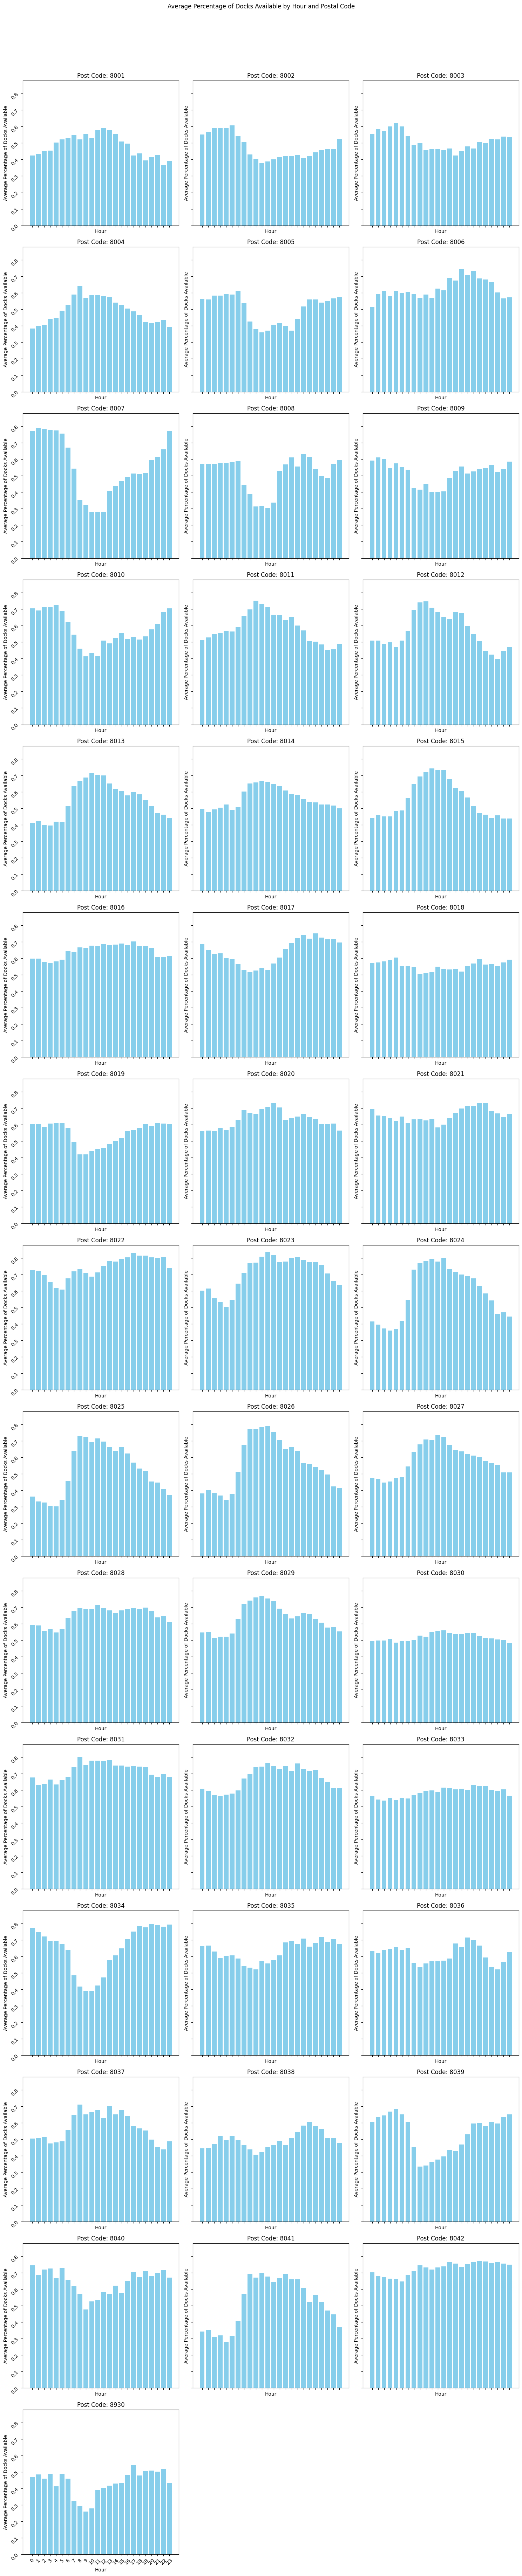

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data loading (ensure this step is done correctly)
# stations_final = pd.read_csv('path_to_your_data.csv')

# Group by 'post_code' and 'hour', then calculate the mean
stations_grouped = stations_final.groupby(['post_code', 'hour'])['percentage_docks_available'].mean().reset_index()

# Get unique post_codes
post_codes = stations_grouped['post_code'].unique()

# Determine the layout of the subplot grid
n_cols = 3  # Number of columns in the grid
n_rows = (len(post_codes) + n_cols - 1) // n_cols  # Compute the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), sharex=True, sharey=True)
fig.suptitle('Average Percentage of Docks Available by Hour and Postal Code')

# Flatten the axes array for easier iteration if there are multiple rows and columns
axes = axes.flatten()

# Loop through each post_code and create a plot
for i, code in enumerate(post_codes):
    ax = axes[i]
    # Filter the data for the current post_code
    data = stations_grouped[stations_grouped['post_code'] == code]
    # Create a numeric range for the x-axis positions
    x_pos = range(len(data['hour']))
    # Plot
    ax.bar(x_pos, data['percentage_docks_available'], color='skyblue')
    ax.set_title(f'Post Code: {code}')
    ax.set_xlabel('Hour')
    ax.set_ylabel('Average Percentage of Docks Available')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(data['hour'])
    ax.tick_params(labelrotation=45)

# Hide any unused axes if there are any
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to make room for the main title
plt.show()

The previous set of figures shows the average percentage of docks available by hour and post code. Zones/post codes with a lot of activity during the day (for example, Plaça Catalunya - 08007) exhibit a U-shape, indicating that many people leave their bikes in that place (few spots available). In residential areas or other places that are less busy during the day but where people return home for sleeping, we observe a flat curve or even an inverted U-shape.

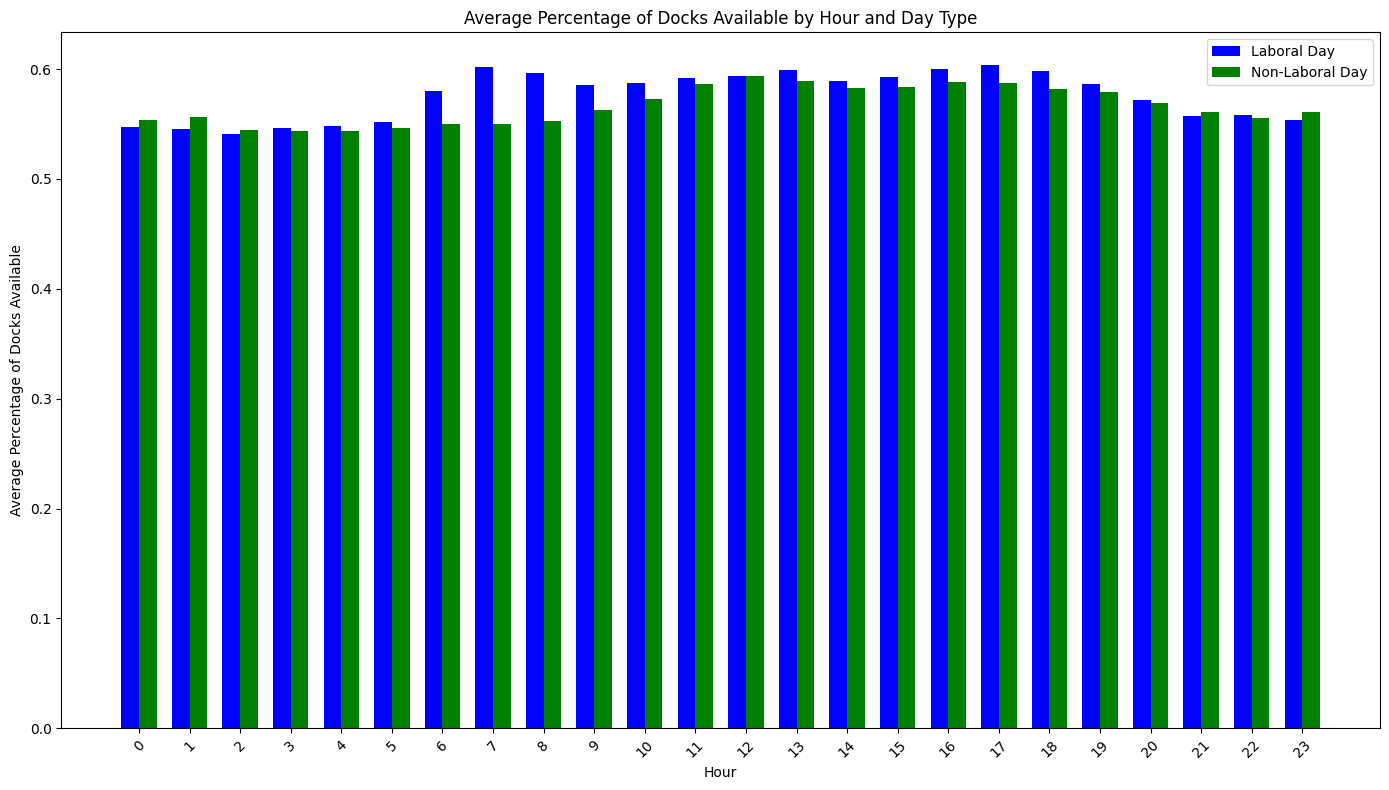

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'stations_final' is your DataFrame and it includes 'hour', 'percentage_docks_available', and 'laboral_day'

# Group by 'hour' and 'laboral_day' and calculate the mean of 'percentage_docks_available'
stations_grouped = stations_final.groupby(['hour', 'laboral_day'])['percentage_docks_available'].mean().unstack()

# Plotting
plt.figure(figsize=(14, 8))  # Adjust the size to fit your specific needs

# Create bars for laboral and non-laboral days
x = range(len(stations_grouped))  # Numeric range for x-axis positions based on the number of hours
width = 0.35  # Width of the bars

# Create bar plots
plt.bar(x, stations_grouped[True], width=width, label='Laboral Day', color='blue')  # Bars for laboral days
plt.bar([p + width for p in x], stations_grouped[False], width=width, label='Non-Laboral Day', color='green')  # Bars for non-laboral days

plt.xlabel('Hour')  # Label for the x-axis
plt.ylabel('Average Percentage of Docks Available')  # Label for the y-axis
plt.title('Average Percentage of Docks Available by Hour and Day Type')  # Title of the plot

# Set x-ticks to be the hours from the DataFrame, positioned in the center of the grouped bars
plt.xticks([p + width / 2 for p in x], stations_grouped.index, rotation=45)  # Adjust rotation if necessary
plt.legend()  # Add legend to distinguish between laboral and non-laboral days

plt.tight_layout()  # Adjusts plot parameters to give some padding
plt.show()

Next, we split the days of the week into labour days (Monday to Friday) and non-labour days (Saturday and Sunday) and look at hourly patterns. We ignore other public holidays since there are only two (1 Jan and 6 Jan) in the first trimester. The figure reflects that, on week days, people use Bicing even in winter to go to work in the morning (6-9 am, more bikes circulating and thus more spots available) but not so much on weekends. On weekends, at some hours late in the night (leisure/going out) the reverse happens.

/var/folders/b_/j13k5nq9673_y1f35zsdbfk80000gn/T/ipykernel_9959/1811072151.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stations_grouped = stations_final.groupby(['post_code', 'laboral_day'])['percentage_docks_available'].mean().unstack()


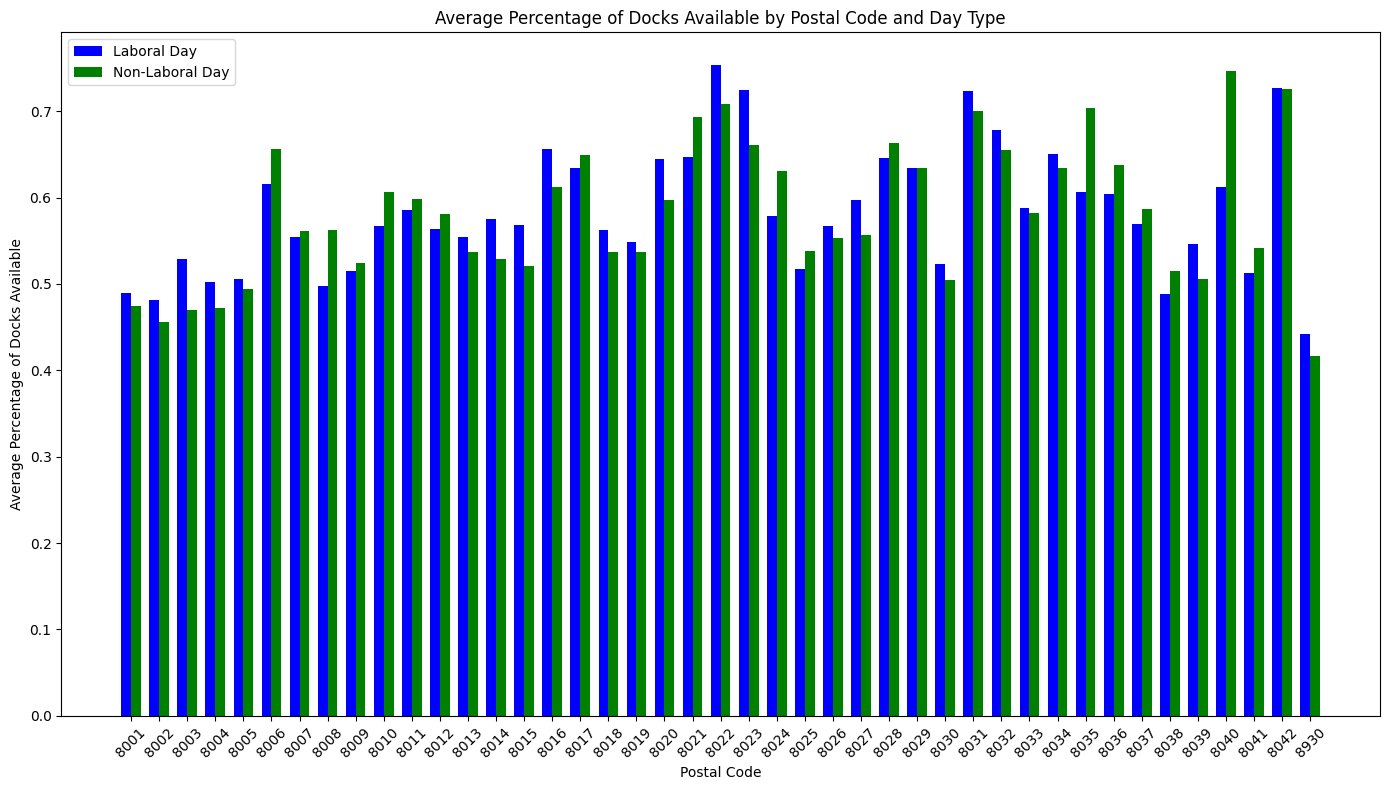

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'stations_final' is your DataFrame and includes 'post_code', 'percentage_docks_available', and 'laboral_day'

# Group by 'post_code' and 'laboral_day', then calculate the mean of 'percentage_docks_available'
stations_grouped = stations_final.groupby(['post_code', 'laboral_day'])['percentage_docks_available'].mean().unstack()

# Plotting
plt.figure(figsize=(14, 8))  # Adjust the size to fit your specific needs

# Create bars for laboral and non-laboral days
x = range(len(stations_grouped))  # Numeric range for x-axis positions based on the number of postal codes
width = 0.35  # Width of the bars

# Create bar plots
plt.bar(x, stations_grouped[True], width=width, label='Laboral Day', color='blue')  # Bars for laboral days
plt.bar([p + width for p in x], stations_grouped[False], width=width, label='Non-Laboral Day', color='green')  # Bars for non-laboral days

plt.xlabel('Postal Code')  # Label for the x-axis
plt.ylabel('Average Percentage of Docks Available')  # Label for the y-axis
plt.title('Average Percentage of Docks Available by Postal Code and Day Type')  # Title of the plot

# Set x-ticks to be the postal codes from the DataFrame, positioned in the center of the grouped bars
plt.xticks([p + width / 2 for p in x], stations_grouped.index, rotation=45)  # Adjust rotation if necessary
plt.legend()  # Add legend to distinguish between laboral and non-laboral days

plt.tight_layout()  # Adjusts plot parameters to give some padding
plt.show()

We split again by labour and non-labour days and compare patterns across post codes. We ignore other public holidays since there are only two (1 Jan and 6 Jan) in the first trimester. The graph gives an indication of differences between business/industrial zones, leisure zones, and balanced neighbourhoods. For example, Zona Franca (post code 08040) is an industralized area that attracts workers from other zones during the week (therefore, higher occupation/fewer splots available) but few people on weekends (more spots available). Similar in 08007 (Plaça Catalunya), where workers working outside Barcelona city leave their bikes during the week to catch other transport to get to work. In contrast, in neighbourhoods that are visited for leisure on weekends but less during the week (such as the Gothic Quarter - 08003), the reverse happens.

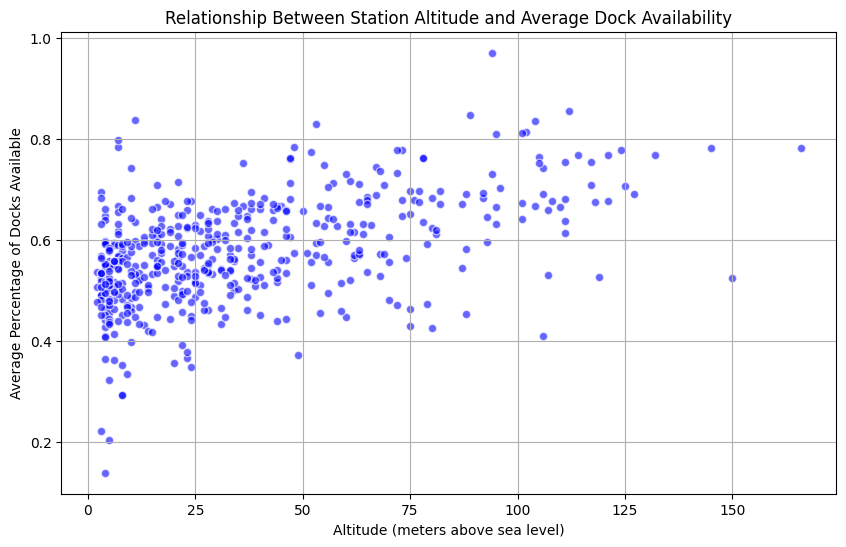

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que 'stations_final' es tu DataFrame y contiene las columnas 'percentage_docks_available' y 'altitude'

# Calcula la ocupación media de cada estación y la altitud media (si la altitud varía, aunque normalmente no debería)
station_means = stations_final.groupby('station_id').agg({
    'percentage_docks_available': 'mean',
    'altitude': 'mean'
}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Crear un scatter plot
plt.scatter(station_means['altitude'], station_means['percentage_docks_available'], alpha=0.6, edgecolors='w', color='blue')

plt.xlabel('Altitude (meters above sea level)')  # Etiqueta del eje X
plt.ylabel('Average Percentage of Docks Available')  # Etiqueta del eje Y
plt.title('Relationship Between Station Altitude and Average Dock Availability')  # Título del gráfico

# Mostrar el gráfico
plt.grid(True)  # Añadir una cuadrícula para facilitar la lectura
plt.show()

Finally, we plot the mean percentage of bikes available for each station against the altitude of the station. Each dot in the figure represents a station. The graph reveals a slight upward trend, suggesting that stations located in higher altitudes have more spots available because users take the bikes downhill into the city but fewer people do the reverse.

In sum, these four 'internal' variables included in the dataset - post code, hour, week day, altitude - provide a good approximation of the characteristics of the different areas of Barcelona thay may affect bike use. They may explain differences among stations in the percentage of spots available even if the context variables (previous four hours) of different stations are similar. Therefore, we would think that adding these four variables - or a combination of them - to the model could potentially improve prediction. Moreover, the four variables reflect different characteristics of the locations of the stations that cannot be measured directly (e.g., business vs. leisure) but are adequately approximated through the four variables. We therefore decide not to unnecessarily complicate the model by including any other external variables other than precipitation levels (still to be added).